In [2]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from SplittingData import splitting_data
from Metrics import metrics_calculation, metrics_table
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_train, y_train, test_set = splitting_data()

In [4]:
def GridSearchCV_SFS(feature_num, X_train, y_train, selected_features):
    
    SFS = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=feature_num, cv=7, n_jobs=-1, scoring='r2')
    SFS.fit(X_train, y_train)
    
    selected_features.append(SFS.support_)
    
    return SFS.transform(X_train)

Due to the fact that it take a huge amount of time to process GridCV + SequentialFeatureSelector, this below code is hide in order to avoid running unncessarily. Instead, the result is assigned manually (it was processed and validated properly)

This image below show R2 Score metric through number of selected features. 

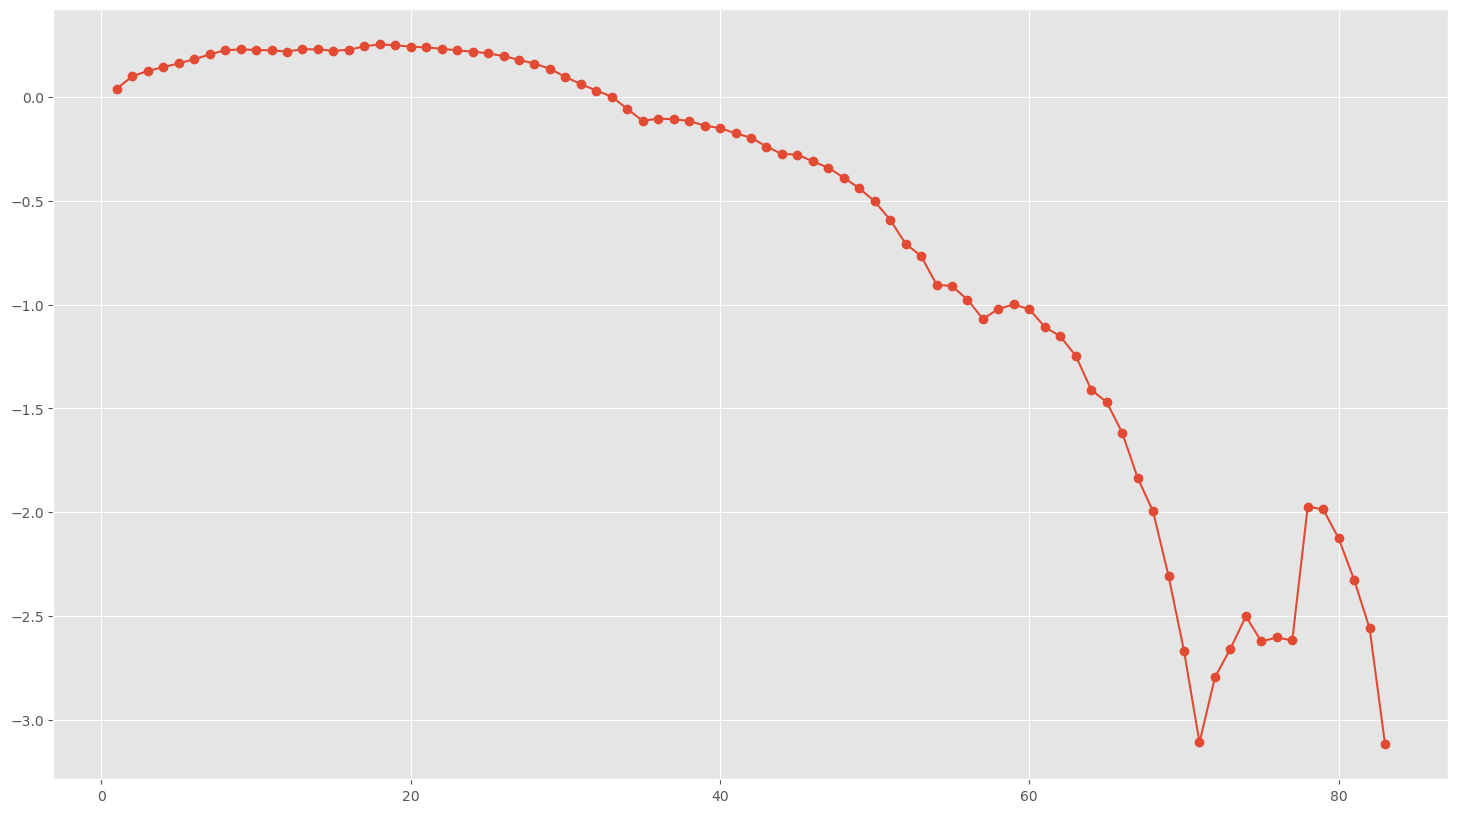

In [5]:
# selected_features = []

# scores = []

# for feature_num in np.arange(1, 84, 1):
#     r2_score = cross_val_score(estimator=LinearRegression(), X=GridSearchCV_SFS(feature_num=feature_num, X_train=X_train, y_train=y_train, selected_features=selected_features), y=y_train, scoring="r2", cv=7, n_jobs=-1).mean()
#     scores.append(r2_score)

r2_score = 0.2537057120900205

predictors = ['Eva_V', 'Eva_IX', 'Eva_XI', 'Prcp_VII', 'Prcp_max_VII', 'Prcp_max_X',
       'Tavg_VIII', 'Tmax_avg_VIII', 'Tmin_avg_VII', 'Tmin_avg_X', 'Tmax_V',
       'Tmax_VI', 'Tmax_VII', 'Tmax_IX', 'Tmax_X', 'Hmin_X', 'Shours_VIII',
       'Shours_X']


In [6]:
linear_model = LinearRegression().fit(X_train[predictors], y_train)

In [7]:
avg_y_train=y_train['RandomCropYield'].mean()

In [8]:
print("Metrics calculation on Training Set:\n", metrics_calculation(y_actual=y_train, y_pred=linear_model.predict(X_train[predictors]), avg_y_train=avg_y_train))
print("Metrics calculation on Test Set (From 2017 - 2020):")

metrics_table(starting_year=2017, test_set=test_set, estimator=linear_model, predictors=predictors, avg_y_train=avg_y_train)

Metrics calculation on Training Set:
 [2.9246078535055124, 2.436602344476682, 0.25376716747984196, 8.55333109678612, 1.8556545247404272, 0.8398020026129819, 0.746232832520158]
Metrics calculation on Test Set (From 2017 - 2020):


,Year,RMSE,RRMSE (in %),R2_Score,MSE,MAE,RAE,RSE
0,2017.0,4.023081,28.214423,0.634482,16.185185,3.462100,2.145175,5.278536
1,2018.0,3.841178,11.703486,-3.913705,14.754646,3.510677,2.788591,5.253546
2,2019.0,4.176953,7.893319,-5.804198,17.446936,4.014907,5.900912,24.728037
3,2020.0,3.210043,15.837979,-1.666519,10.304379,2.761156,1.588465,2.755692
